# Kobe Bryant shot selection 

### 載入套件及data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import math as m
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.cross_validation import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None) # display all columns

C:\Users\fang\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('data.csv', encoding='BIG5')
not_applicable = df['shot_made_flag'].isnull()

df = df[~not_applicable]

In [3]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

In [5]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [6]:
df.describe(include=['object', 'category'])

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
count,25697,25697,25697,25697,25697,25697,25697,25697,25697,25697,25697
unique,55,6,20,2,6,7,5,1,1558,74,33
top,Jump Shot,Jump Shot,2005-06,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,15836,19710,1924,20285,11289,10532,7857,25697,43,853,1638


### Data視覺化

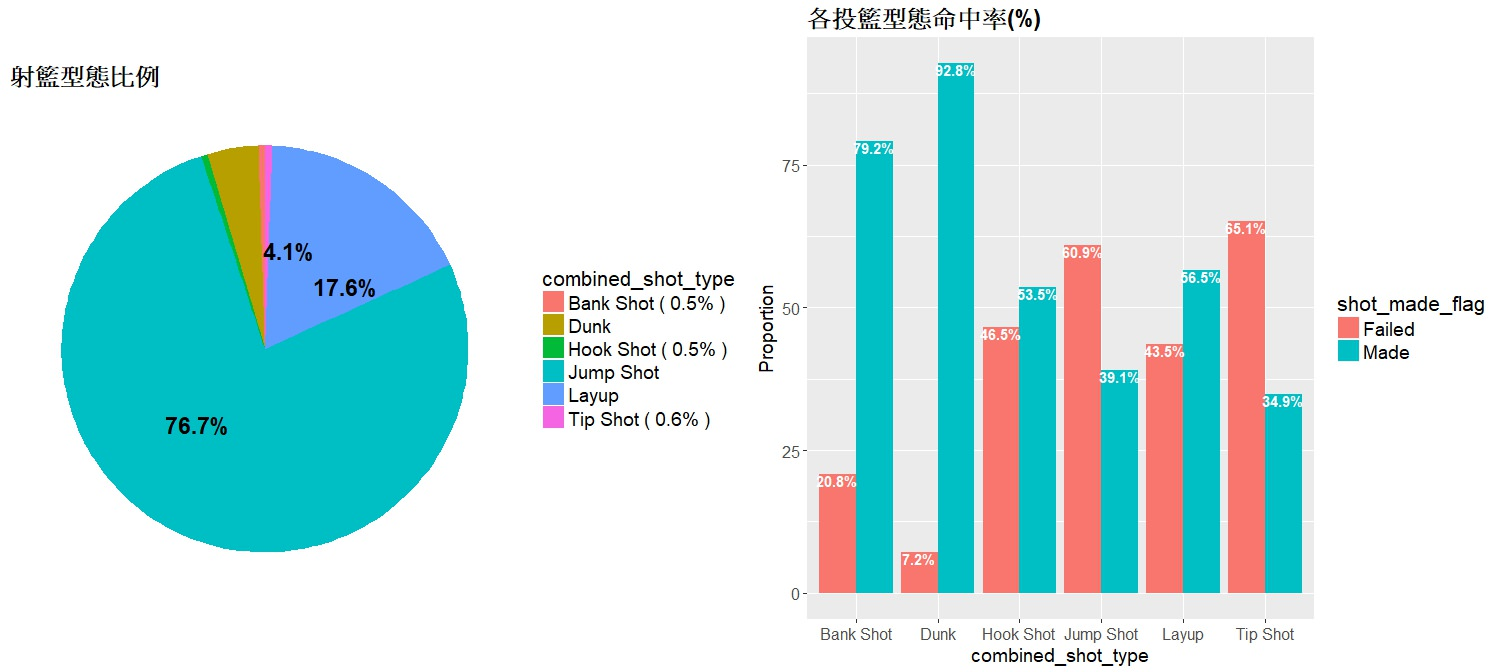

In [7]:
from IPython.display import Image
from IPython.display import display
Image('https://i.imgur.com/IykGbhG.jpg')

根據上圖可以看出我們布萊恩先生最愛的射籃型態是jump shot，但其命中率只有39.1%；而扣除掉dunk，布萊恩先生命中率最高的是bank shot，但只佔他出手比率的0.5，%顯然不喜歡這種投射姿勢><

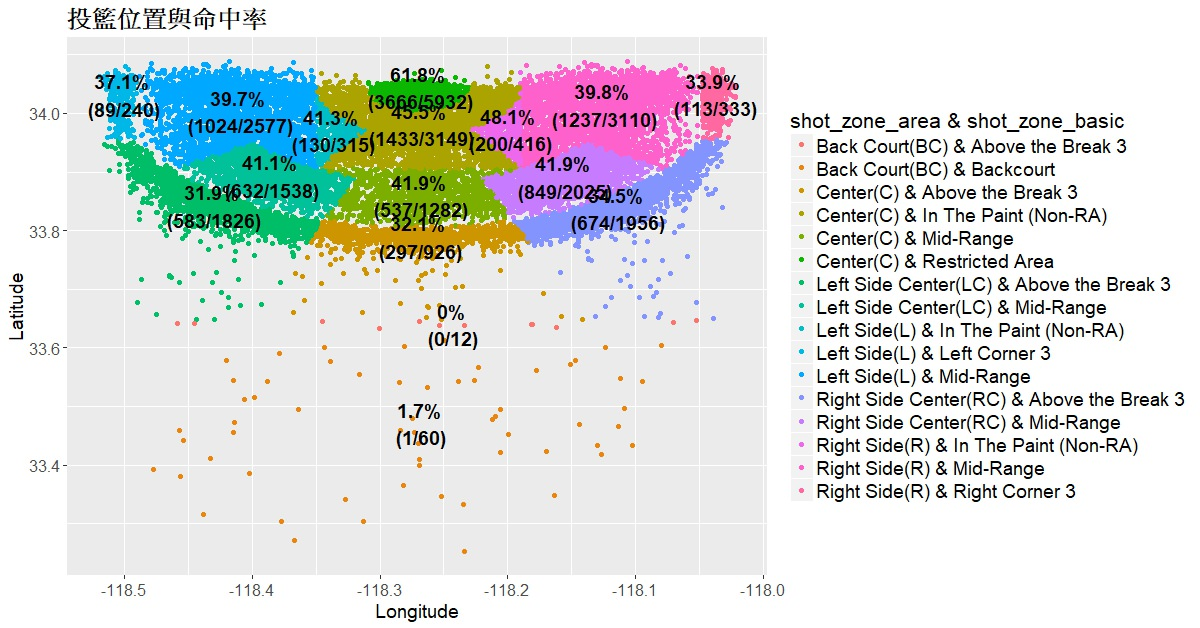

In [8]:
Image('https://i.imgur.com/r6PRwR3.jpg')

根據此圖可看出老大較喜歡在球場左邊進行攻擊，或許這和他慣用手為右手有關。而且儘管老大較常在左邊做出手，他的命中率也不遜於右側，所以下次和Kobe在球場上較勁時，記得踩住他右切的路線，不然會被他射得不要不要的。<br/>
再來是老大統治NBA的時代，三分線瘋狂出手及過了半場旱地拔蔥Logo shot尚未盛行，因此他在三分線外的命中率也不算太高。

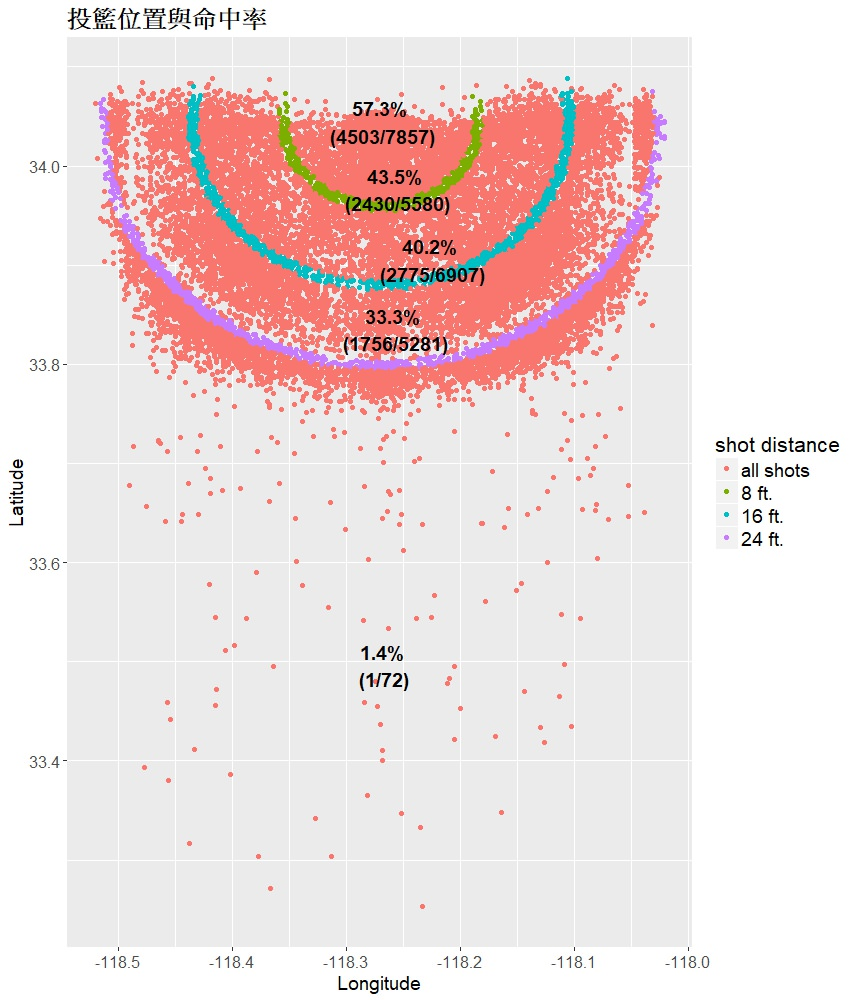

In [9]:
Image('https://i.imgur.com/jdjEJcM.jpg', width="400")

根據此圖，老大的投射命中率隨投射距離明顯地遞減，在16ft.-24ft.間他瘋狂射籃，射了將近7000發，但命中率僅40.2%，而印象派球迷也常詬病他中距離的出手選擇，以實際數據分析結果也是相同結果。

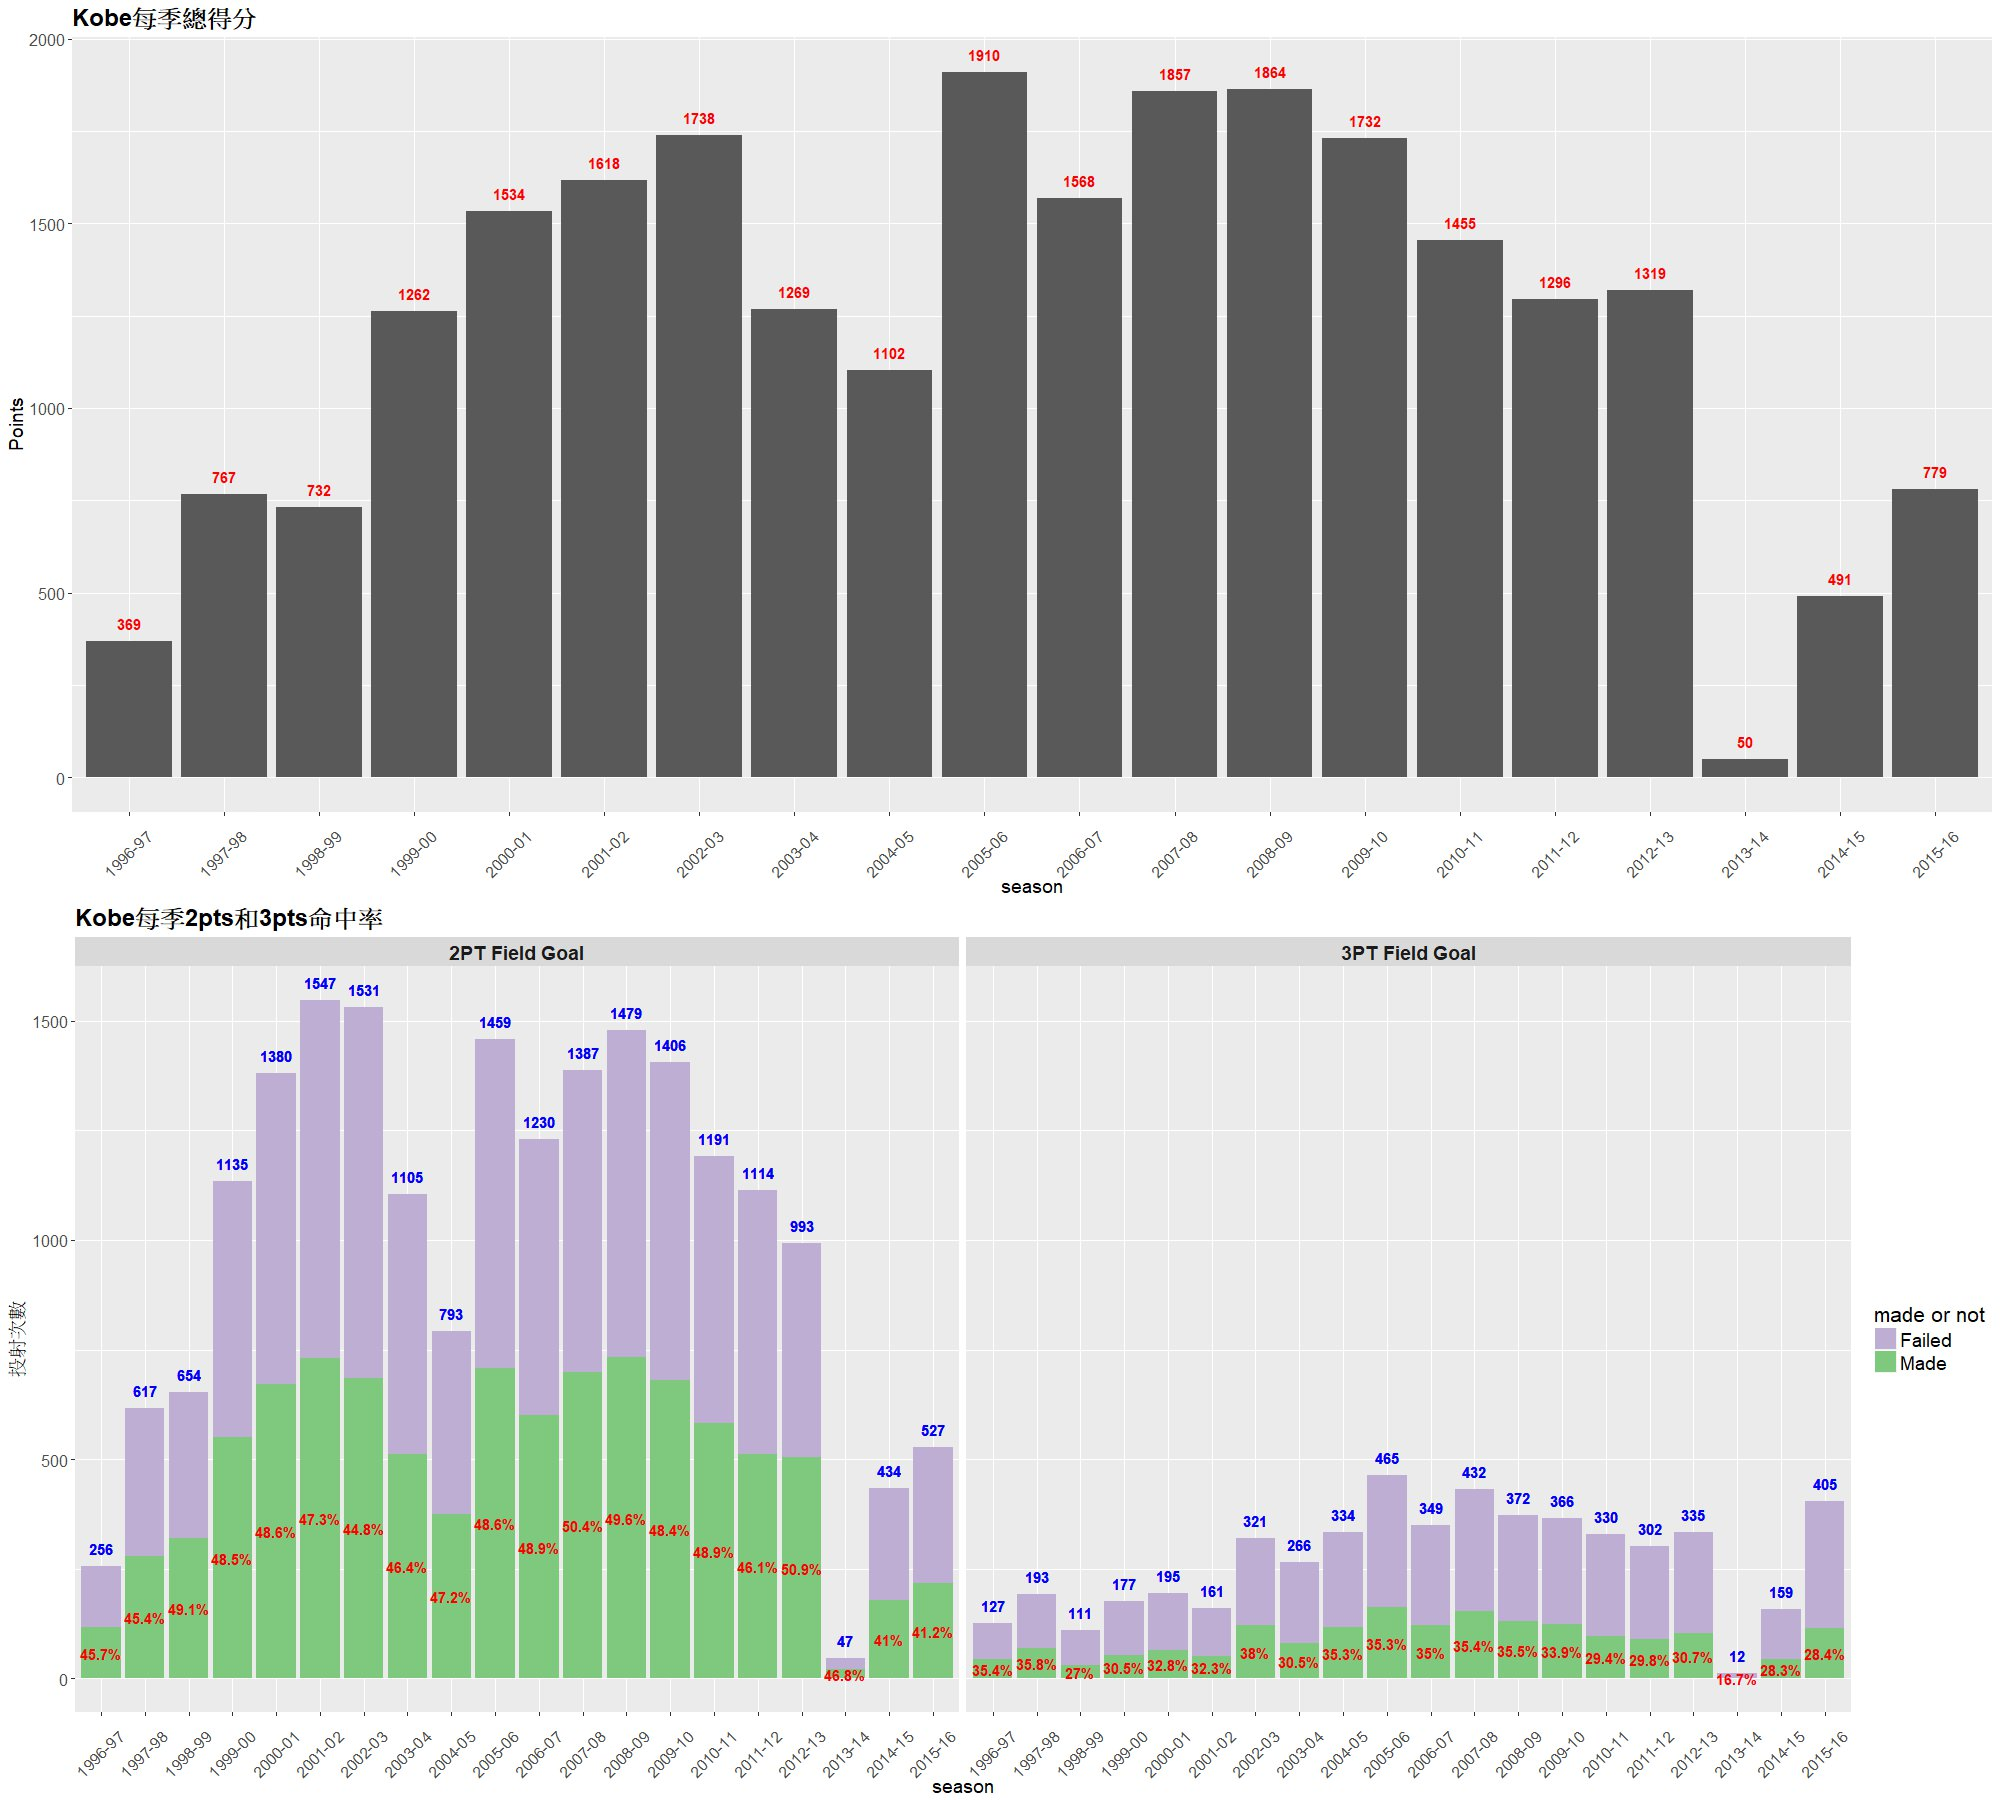

In [10]:
Image('https://i.imgur.com/SDiLPM8.jpg')

在2008-09賽季Kobe老大得到了NBA MVP的殊榮，當年他幹進了生涯第二高的1864分，2分球命中率49.6%、3分球命中率為35.5%，效率頗高，可說是魅力四射、風靡萬眾的一年<br/>
在2012-13賽季末段可謂是老大迷心碎的一年，心裡有如他阿基里斯腱般被狠狠撕裂，也自此賽季過後，他身手不再，從此走下神壇。

### Data及特徵整理

In [11]:
df["game_year"] = df["game_date"].str[0:4].astype(int)
df["game_month"] = df["game_date"].str[5:7].astype(int)

In [12]:
df['action_first_words'] = df["action_type"].str.split(' ').str[0]

In [13]:
df['season_start_year'] = df.season.str.split('-').str[0].astype(int)

In [14]:
df["remaining"] = df["minutes_remaining"] * 60 + df["seconds_remaining"]

In [15]:
df['away'] = df.matchup.str.contains('@')

In [16]:
df['distance_bin'] = pd.cut(df.shot_distance, bins=10, labels=range(10))

In [17]:
df['angle'] = df.apply(lambda row: 90 if row['loc_y']==0 else m.degrees(m.atan(row['loc_x']/abs(row['loc_y']))),axis=1)
df['angle_bin'] = pd.cut(df.angle, 7, labels=range(7))
df['angle_bin'] = df.angle_bin.astype(int)

### 選取訓練、測試集，並作第一次Features選取

In [18]:
train = df.copy()
test = pd.DataFrame(df[['shot_made_flag', 'shot_id']].copy())

In [19]:
selected_features = ['action_first_words', 'combined_shot_type', 'remaining', 'period', 'season_start_year'
    , 'shot_type', 'shot_zone_basic', 'shot_zone_range', 'game_year',
    'game_month', 'opponent', 'away', 'distance_bin', 'angle_bin', 'shot_id']

In [20]:
train = train[selected_features]
train = pd.get_dummies(train)

In [21]:
# 設定訓練集、切割測試集
testid = [30085, 26369, 27841, 15946, 22900]

X_train = train[(train.shot_id != testid[0]) & (train.shot_id != testid[1]) & (train.shot_id != testid[2]) & (train.shot_id != testid[3]) & (train.shot_id != testid[4])]
Y_train = test[(test.shot_id != testid[0]) & (test.shot_id != testid[1]) & (test.shot_id != testid[2]) & (test.shot_id != testid[3]) & (test.shot_id != testid[4])].drop('shot_id', axis = 1)

X_test_1 = train[train.shot_id == testid[0]]
X_test_2 = train[train.shot_id == testid[1]]
X_test_3 = train[train.shot_id == testid[2]]
X_test_4 = train[train.shot_id == testid[3]]
X_test_5 = train[train.shot_id == testid[4]]

### 用random forest再進行第二次features選取

In [22]:
rfc = RandomForestClassifier()

In [23]:
rfc.fit(X_train, Y_train)

C:\Users\fang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [24]:
features_good_fit = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=["good_fit"])
top50features = features_good_fit.sort_values("good_fit", ascending=False).head(50).index

In [25]:
top50features

Index(['remaining', 'shot_id', 'angle_bin', 'game_year', 'season_start_year',
       'game_month', 'period', 'action_first_words_Jump', 'away',
       'action_first_words_Driving', 'action_first_words_Layup',
       'combined_shot_type_Jump Shot', 'combined_shot_type_Dunk',
       'action_first_words_Running', 'opponent_SAC', 'opponent_HOU',
       'opponent_DEN', 'opponent_GSW', 'opponent_POR', 'opponent_PHX',
       'opponent_SAS', 'opponent_DAL', 'opponent_UTA', 'opponent_MIN',
       'opponent_LAC', 'opponent_MEM', 'action_first_words_Turnaround',
       'shot_zone_basic_Restricted Area', 'opponent_ORL', 'opponent_BOS',
       'combined_shot_type_Layup', 'opponent_TOR', 'opponent_MIA',
       'opponent_SEA', 'opponent_NYK', 'opponent_PHI',
       'shot_zone_basic_In The Paint (Non-RA)', 'opponent_CHA', 'opponent_DET',
       'action_first_words_Pullup', 'opponent_CLE', 'opponent_IND',
       'opponent_WAS', 'opponent_MIL', 'opponent_NJN', 'opponent_CHI',
       'opponent_ATL', 'opp

In [26]:
X_train = X_train[top50features]

X_test_1 = X_test_1[top50features]
X_test_2 = X_test_2[top50features]
X_test_3 = X_test_3[top50features]
X_test_4 = X_test_4[top50features]
X_test_5 = X_test_5[top50features]

### 用線性回歸作預測

In [27]:
regressor = LinearRegression()

regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
scores = cross_validation.cross_val_score(regressor, X_train, Y_train, cv=10)
print ("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() / 2))    

Accuracy: 0.123 (+/- 0.007)


### 開始test

#### 第一題- 1997年季後賽Game5 @UTAH，延長賽剩7秒，落後3分的湖人隊，是否能靠老大一舉追平呢？

In [29]:
display(Image(url='https://i.imgur.com/K6PQviM.gif'))

In [30]:
np.round(regressor.predict(X_test_1))

array([[0.]])

* 預測結果Kobe這球不會進

In [31]:
display(Image(url='https://i.imgur.com/YoOHeO2.gif'))

* 結果真的沒進，還airball，哈哈哈(1/1)

#### 第二題- 2001季後賽Game1 @SAS，第三節剩57秒，Kobe使出了苦練多年的dream shake，將進球與否？

In [32]:
display(Image(url='https://i.imgur.com/q7mcHZr.gif'))

In [33]:
np.round(regressor.predict(X_test_2))

array([[1.]])

* 預測結果老大帥氣得分

In [34]:
display(Image(url='https://i.imgur.com/whyUbuw.gif'))

* 老大果然沒讓球迷失望，帥氣入網，真的帥(2/2)

#### 第三題- 2006季後賽Game4 v.s. PHX，延長賽最後出手，是否一雪前恥呢？

In [35]:
display(Image(url='https://i.imgur.com/9c2SVXX.gif'))

In [36]:
np.round(regressor.predict(X_test_3))

array([[0.]])

* 保守預測這球不進

In [37]:
display(Image(url='https://i.imgur.com/TVEdivF.gif'))

* 結果這球決殺了太陽隊，贏得勝利，更贏得球迷的芳心<3，但預測錯誤了QQ(2/3)

#### 第四題- 2010例行賽@BOS，湖人又落後一分，老大是否能利用他的無條件蝦捲跳投，擊敗宿敵呢？

In [38]:
display(Image(url='https://i.imgur.com/AiayiFK.gif'))

In [39]:
np.round(regressor.predict(X_test_4))

array([[1.]])

* 經過上一題的愚昧，預測結果就不再小看老大

In [40]:
display(Image(url='https://i.imgur.com/H346e7f.gif'))

* 老大果然射進啦！守多緊都沒用啦！(3/4)

#### 第五題- 2016例行賽v.s. UTAH，老大在他的farewell game，已攻下53分，能否再利用這球刷到56分並將差距縮小至一分？

In [41]:
display(Image(url='https://i.imgur.com/Cji3dAY.gif'))

In [42]:
np.round(regressor.predict(X_test_5))

array([[1.]])

* #相信老大

In [43]:
display(Image(url='https://i.imgur.com/6tLAylj.gif'))

* 啊啊啊進去啦～眼眶微濕，你怎能不愛Kobe？(4/5)